In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings

ModuleNotFoundError: No module named 'pandas'

In [2]:
#Ignore depracation warnings for this notebook
warnings.filterwarnings('ignore')

In [3]:
#Load the CSV file - it's already been scraped and preprocessed
Results = pd.DataFrame
Results = pd.read_table('Berlin_Marathon_2017_Results_Clean.csv', delimiter=',')

Results = Results.astype({"Age": int, 'Time': float, 'Start Time': float})
Results.head()


,Country,Gender,Age,Time,Start Time
0,KEN,M,30,123.533333,0.00
1,ETH,M,35,123.766667,0.00
2,ETH,M,35,126.150000,0.05
3,KEN,M,30,126.216667,0.00
4,KEN,M,30,126.233333,0.00


<Axes: xlabel='Gender', ylabel='count'>

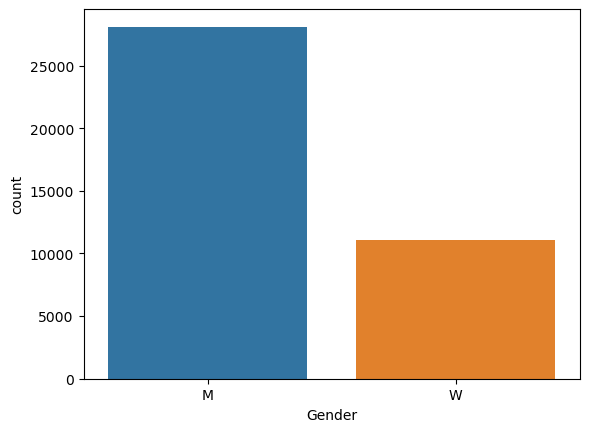

In [4]:
sns.countplot(x='Gender', data=Results)

In [5]:
Results_by_Country = Results.groupby('Country', as_index=False).count()[['Country', 'Time']]
Results_by_Country = Results_by_Country.sort_values(by = ['Time'], ascending = False)
print(Results_by_Country.head())
print('There are ' + str(len(Results_by_Country)) + ' countries represented')

Countries_with_one_Runner = Results_by_Country[Results_by_Country['Time'] == 1]
print(Countries_with_one_Runner)
print('There are ' + str(len(Countries_with_one_Runner)) + ' countries with only one runner competing')

    Country   Time
46      GER  15880
45      GBR   2505
130     USA   2026
31      DEN   1712
43      FRA   1466
There are 135 countries represented
    Country  Time
127     UGA     1
121     TOG     1
10      BAR     1
22      CMR     1
23      COD     1
27      CUB     1
123     TRI     1
133     ZAM     1
28      CUW     1
41      FIJ     1
32      DMA     1
119     TAN     1
89      MYA     1
44      FRO     1
50      GUI     1
51      GUY     1
73      LAO     1
107     SEN     1
76      LIE     1
83      MDV     1
87      MLT     1
103     QAT     1
88      MTN     1
0       AFG     1
There are 24 countries with only one runner competing


In [6]:
Results['Start Minute'] = np.floor(Results['Start Time'])
Results_by_Start_Minute = Results.groupby('Start Minute', as_index=False).count()[['Start Minute', 'Time']]
print(Results_by_Start_Minute)

    Start Minute  Time
0            0.0  2116
1            1.0  1724
2            2.0  1622
3            3.0  1578
4            4.0  1474
5            5.0  1249
6            6.0   669
7            7.0    65
8            8.0    23
9            9.0     4
10          10.0     3
11          20.0  1764
12          21.0  1549
13          22.0  1453
14          23.0  1437
15          24.0  1296
16          25.0  1436
17          26.0  1294
18          27.0  1247
19          28.0  1178
20          29.0  1038
21          30.0   659
22          31.0    97
23          32.0    20
24          45.0  1745
25          46.0  1389
26          47.0  1271
27          48.0  1317
28          49.0  1219
29          50.0  1244
30          51.0  1168
31          52.0  1082
32          53.0  1079
33          54.0  1074
34          55.0   933
35          56.0   606
36          57.0    25
37          58.0     3
38          62.0     1


<Axes: xlabel='Start Time'>

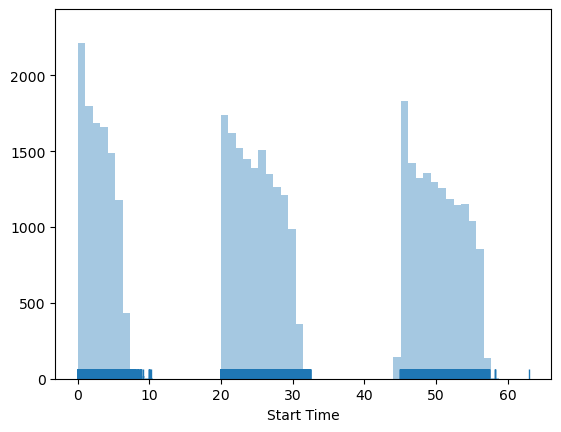

In [7]:
sns.distplot(Results['Start Time'], bins = 60, kde=False, rug=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39151 entries, 0 to 39150
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              39151 non-null  object 
 1   Gender               39151 non-null  object 
 2   Age                  39151 non-null  int32  
 3   Time                 39151 non-null  float64
 4   Adjusted Start Time  39151 non-null  float64
dtypes: float64(2), int32(1), object(2)
memory usage: 1.3+ MB
None


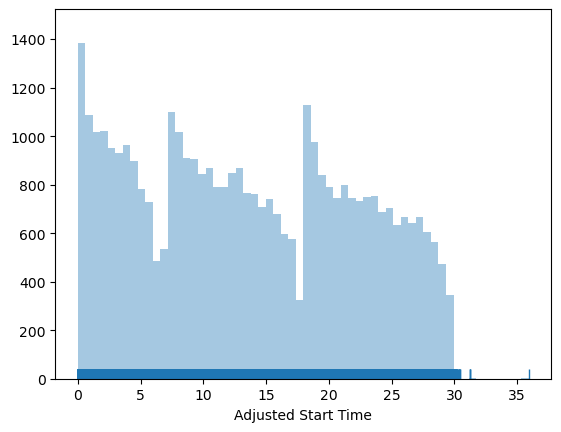

In [8]:
def adj_start(x):
    if x < 20:
        return x
    elif x < 45:
        return x - 13
    else:
        return x - 27
Results['Adjusted Start Time'] = Results['Start Time'].map(lambda x: adj_start(x))
sns.distplot(Results['Adjusted Start Time'], bins = 60, kde=False, rug=True)

Results = Results.drop('Start Time', axis = 1)
Results = Results.drop('Start Minute', axis = 1)
print(Results.info())

In [9]:
le_gender = LabelEncoder()
Results['Gender'] = le_gender.fit_transform(Results['Gender'])

ohe_country = OneHotEncoder(categories='auto')
X = ohe_country.fit_transform(Results.Country.values.reshape(-1,1)).toarray()
CountryOneHot = pd.DataFrame(X, columns = ["Country_"+str(int(i)) for i in range(X.shape[1])])
Results = pd.concat([Results, CountryOneHot], axis=1)
Results = Results.drop('Country', axis=1)

In [10]:
train_set, test_set = train_test_split(Results, test_size=.2, random_state=40)

y_train, y_test = train_set['Time'], test_set['Time']
X_train, X_test = train_set.drop('Time', axis=1), test_set.drop('Time', axis=1)

In [11]:
standardScalerX = StandardScaler()
standardScalerX.fit(X_train)
X_train = standardScalerX.transform(X_train)
X_test = standardScalerX.transform(X_test)

In [12]:
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
y_test_dummy_pred = dummy.predict(X_test)
mean_squared_error_dummy_predict = mean_squared_error(y_test, y_test_dummy_pred)
mean_abs_error_dummy_predict = mean_absolute_error(y_test, y_test_dummy_pred)
print('mean squared error error = ' + str(mean_squared_error_dummy_predict))
print('mean absolute error = ' + str(mean_abs_error_dummy_predict))

mean squared error error = 2115.2026126518654
mean absolute error = 36.574535934873225


In [13]:
ridge = Ridge()
ridge_parameters = {'alpha': [.01,.1,1,10,100,200,1000]}
clf = GridSearchCV(ridge, ridge_parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'alpha': 100}


In [14]:
ridge = Ridge()
ridge_parameters = {'alpha': [10.01, 30.01,50.01,70.01,90.01,110.01,130.01,150.01,170.01,190.01]}
clf = GridSearchCV(ridge, ridge_parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'alpha': 150.01}


In [15]:
reg = Ridge(alpha=150)
reg.fit(X_train, y_train)
y_test_ridge_pred = reg.predict(X_test)
mean_squared_error_ridge_predict = mean_squared_error(y_test, y_test_ridge_pred)
mean_abs_error_ridge_predict = mean_absolute_error(y_test, y_test_ridge_pred)
print('mean squared error error = ' + str(mean_squared_error_ridge_predict))
print('mean absolute error = ' + str(mean_abs_error_ridge_predict))


mean squared error error = 959.0024602923387
mean absolute error = 23.11751209759032


In [16]:
forest_cv = RandomForestRegressor(random_state = 40)
forest_parameters = {'n_estimators': [5, 20, 50, 80], 'max_depth': [5, 10, 20]}
clf_forest = GridSearchCV(forest_cv, forest_parameters, cv=5)
clf_forest.fit(X_train, y_train)
print(clf_forest.best_params_)

{'max_depth': 10, 'n_estimators': 80}


In [17]:
forest = RandomForestRegressor(n_estimators = 80, max_depth = 10)
forest.fit(X_train, y_train)
y_test_forest_pred = forest.predict(X_test)
mean_squared_error_forest_predict = mean_squared_error(y_test, y_test_forest_pred)
mean_abs_error_forest_predict = mean_absolute_error(y_test, y_test_forest_pred)
print('mean squared error error = ' + str(mean_squared_error_forest_predict))
print('mean absolute error = ' + str(mean_abs_error_forest_predict))


mean squared error error = 930.5481829880546
mean absolute error = 22.54466463270873


In [20]:
score1 = reg.score(X_train, y_train) 
print("\n\nModel score : ", score1) 



Model score :  0.5642118463916896


In [21]:
score2 = forest.score(X_train, y_train) 
print("\n\nModel score : ", score2) 



Model score :  0.6363429244951523


In [22]:
score3 = dummy.score(X_train, y_train) 
print("\n\nModel score : ", score3) 



Model score :  0.0


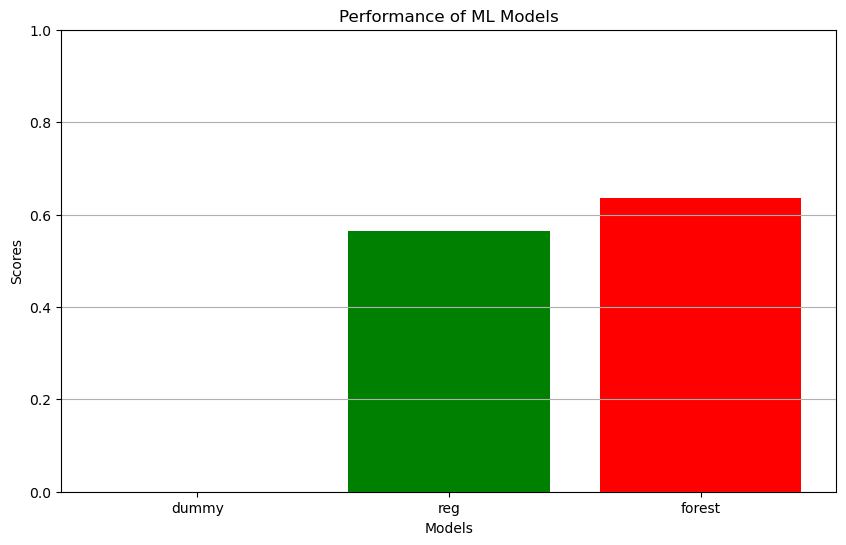

In [23]:
models = ['dummy', 'reg', 'forest']

# Scores of the models
scores = [score3, score1, score2] 

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['blue', 'green', 'red'])

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance of ML Models')
plt.ylim(0, 1)  # Adjust the y-axis limits if needed
plt.grid(axis='y')  # Add gridlines for better visualization
plt.show()